# H1N1 Vaccine Prediction

Author: Christopher Henry

Date: 05/08/24

## Overview

Our goal is to predict how likely individuals are to receive their H1N1 vaccine. We will do this using individuals' responses to a survey covering their opinions on illness and vaccines, socioeconomic background, and personal behaviors. For this approach we will apply two different models to the dataset of independent variables: 1) a logistic regression model, and 2) a decision tree model.

## Data Understanding

The [dataset](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/) for this predictive model comes from responses two the National 2009 H1N1 Flu Survey.

This survey dataset is structured such that each row contains the responses of 1 individual to 35 survey questions, and the survey contains responses from 26,707 individuals. These answers are coded in varying formats: binary (yes/no), ordinal (rating, e.g. 1-5), and categorical (label). Questions cover such topics as: individual's behavior (exposure, use of infection prevention measures, medication), opinions (on infection risk and vaccine effectiveness), and socioeconomic background (sex, race, marital status, education level, housing situation).

**Approach**: We will use the pandas library to organize the dataset and use the scikit-learn library to select and transform features and evaluate predictive and cross-validated model fits to the data.

### Limitations of This Dataset

We are attempting to predict a binary variable (yes/no on receiving H1N1 vaccine) from the other dataset variables. A minority of individuals (~21.2%) received the H1N1 vaccine. Thus we would expect a null model (predicting no vaccination for all individuals) to be correct 78% of the time.

Given the different nature of encoded responses, we will aim to transform and standardize them, in order to identify the most promising variables to input into our logistic regression and decision tree models.

### Importing and Exploring the Dataset

In [1]:
#Import the relevant libraries to load and view the data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in the dataset (both the variables and the labels to predict)
data = pd.read_csv('data/training_set_features.csv', index_col=0)
labels = pd.read_csv('data/training_set_labels.csv', index_col=0)

In [3]:
#Display the columns and first few rows of the data
print('Training data shape: ', data.shape)
data.head()

Training data shape:  (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
#Display the columns and first few rows of the labels
print('Labels shape: ', labels.shape)
labels.head()

Labels shape:  (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [7]:
#convert labels to be floats like the other variables
labels = pd.DataFrame(np.array(labels), columns=labels.columns)
labels[['seasonal_vaccine','h1n1_vaccine']] = labels[['seasonal_vaccine','h1n1_vaccine']].astype(float)

print('H1N1 vaccination rate: ', labels['h1n1_vaccine'].mean())

H1N1 vaccination rate:  0.2124536638334519


#### Extract Numeric and Categorical Variables

In [31]:
#Extract a list of the columns with numeric data
cols_numeric = list(data.columns[data.dtypes == "float64"].values)
print(cols_numeric)

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


We can see from the above that the questions with numerically coded responses cover behavioral topics on exposure and infection prevention, number of household members, and opinions on infection risk and vaccine effectiveness. For further explanation of each coded variable, see the [dataset notes](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#features_list).



In [9]:
#Print out value counts for each variable (so we can see the distribution as well as the number of NaN entries)
for col in data.columns.values:
    print(" ")
    print("Column: ", col)
    
    print(data[col].value_counts(dropna=False))
    print(" ")

 
Column:  h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: h1n1_concern, dtype: int64
 
 
Column:  h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: h1n1_knowledge, dtype: int64
 
 
Column:  behavioral_antiviral_meds
0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64
 
 
Column:  behavioral_avoidance
1.0    19228
0.0     7271
NaN      208
Name: behavioral_avoidance, dtype: int64
 
 
Column:  behavioral_face_mask
0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64
 
 
Column:  behavioral_wash_hands
1.0    22015
0.0     4650
NaN       42
Name: behavioral_wash_hands, dtype: int64
 
 
Column:  behavioral_large_gatherings
0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64
 
 
Column:  behavioral_outside_home
0.0    17644
1.0     8981
NaN       82
Name: behavioral_outside_home, dtype: int64
 
 
Column:  behavioral_touch_face
1.0    18001

In [12]:
#Extract a list of the columns with categorical data
cols_cat = list(data.columns[data.dtypes == "object"].values)

#We are excluding these few categorical variables as they have too many distinct values to be compactly one-hot encoded
cols_cat = [elem for elem in cols_cat if elem not in ['hhs_geo_region','employment_industry','employment_occupation']]
print(cols_cat)

['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


We can see from the above that these categorical columns span questions of socioeconomic status.

In [32]:
#Join the labels columns to the main dataset of variables
data_full = data.join(labels)

cols_numeric = cols_numeric + ['seasonal_vaccine'] ## adding seasonal_vaccine as a predictor variable for h1n1_vaccine

---
---

### Data Visualization

Below, we will visualize how each numeric variable relates to the predictor variable of H1N1 vaccination.
For each response category, we will show a bar plot breaking down the fraction of those unvaccinated (blue) or vaccinated (orange). The number in white at the right shows the total number of survey responses with that category value.


In [17]:
#Define a function to plot the rate of h1n1_vaccination (as a stacked bar plot) as a function of the value in one independent variable

def plot_h1n1vac_rate(df, col_name, ax=None, valuecount=True, legend=True):
    # inputs: 
    #         df -- dataframe
    #         col_name -- string of the column name to plot
    #         ax -- axis handle (optional, default: None)
    #         valeucount -- logical flag for if we want to plot raw counts on the bar plot (optional, default: True)
    #         legend -- logical flag for plotting legend (optional, default: True)
    #d
    # returns: a figure
    #
    # outputs:
    #         None
    
    counts = df[[col_name, 'h1n1_vaccine']].groupby([col_name,'h1n1_vaccine']).size().unstack('h1n1_vaccine')
    counts_sum = counts.sum(axis='columns') #get total occurences of each variable value in 'col_name'
    proportions = counts.div(counts_sum, axis='index') #convert to proportions (of vaccinated = 0 or 1)
    proportions.plot(kind='barh', ax=ax, stacked=True) #plot a stacked bar plot
    
    ax.set_xlabel('h1n1 vaccination rate') #set axis labels
    ax.set_xticks(np.arange(0, 1.1, 0.25))
    ax.set_xticklabels(['0','','0.5','','1'])
    ax.set_ylabel('value')
    ax.set_title(col_name)
    
    if valuecount: #if we're going to show the raw counts for each variable value
        for idx in counts_sum.index: #loop over and plot in white on the right of each stacked bar
            ax.text(0.98, idx, str(counts_sum[idx]), color='w', horizontalalignment='right', verticalalignment='center')
        
    if legend: #for legend plotting
        ax.legend(labels=['h1n1_vaccine=0', 'h1n1_vaccine=1'], loc='lower left')
    else:
        ax.legend().remove()

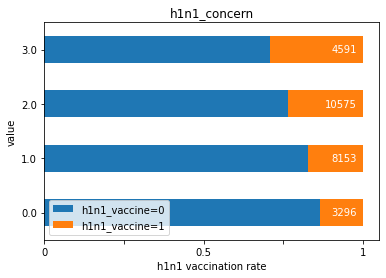

In [18]:
# Plot an example plot showing the vaccination rate for each value of the h1n1_concern variable

fig,ax = plt.subplots()
plot_h1n1vac_rate(data_full, 'h1n1_concern', ax=ax)

Below, we plot this summary plot for each of the numerical variables.

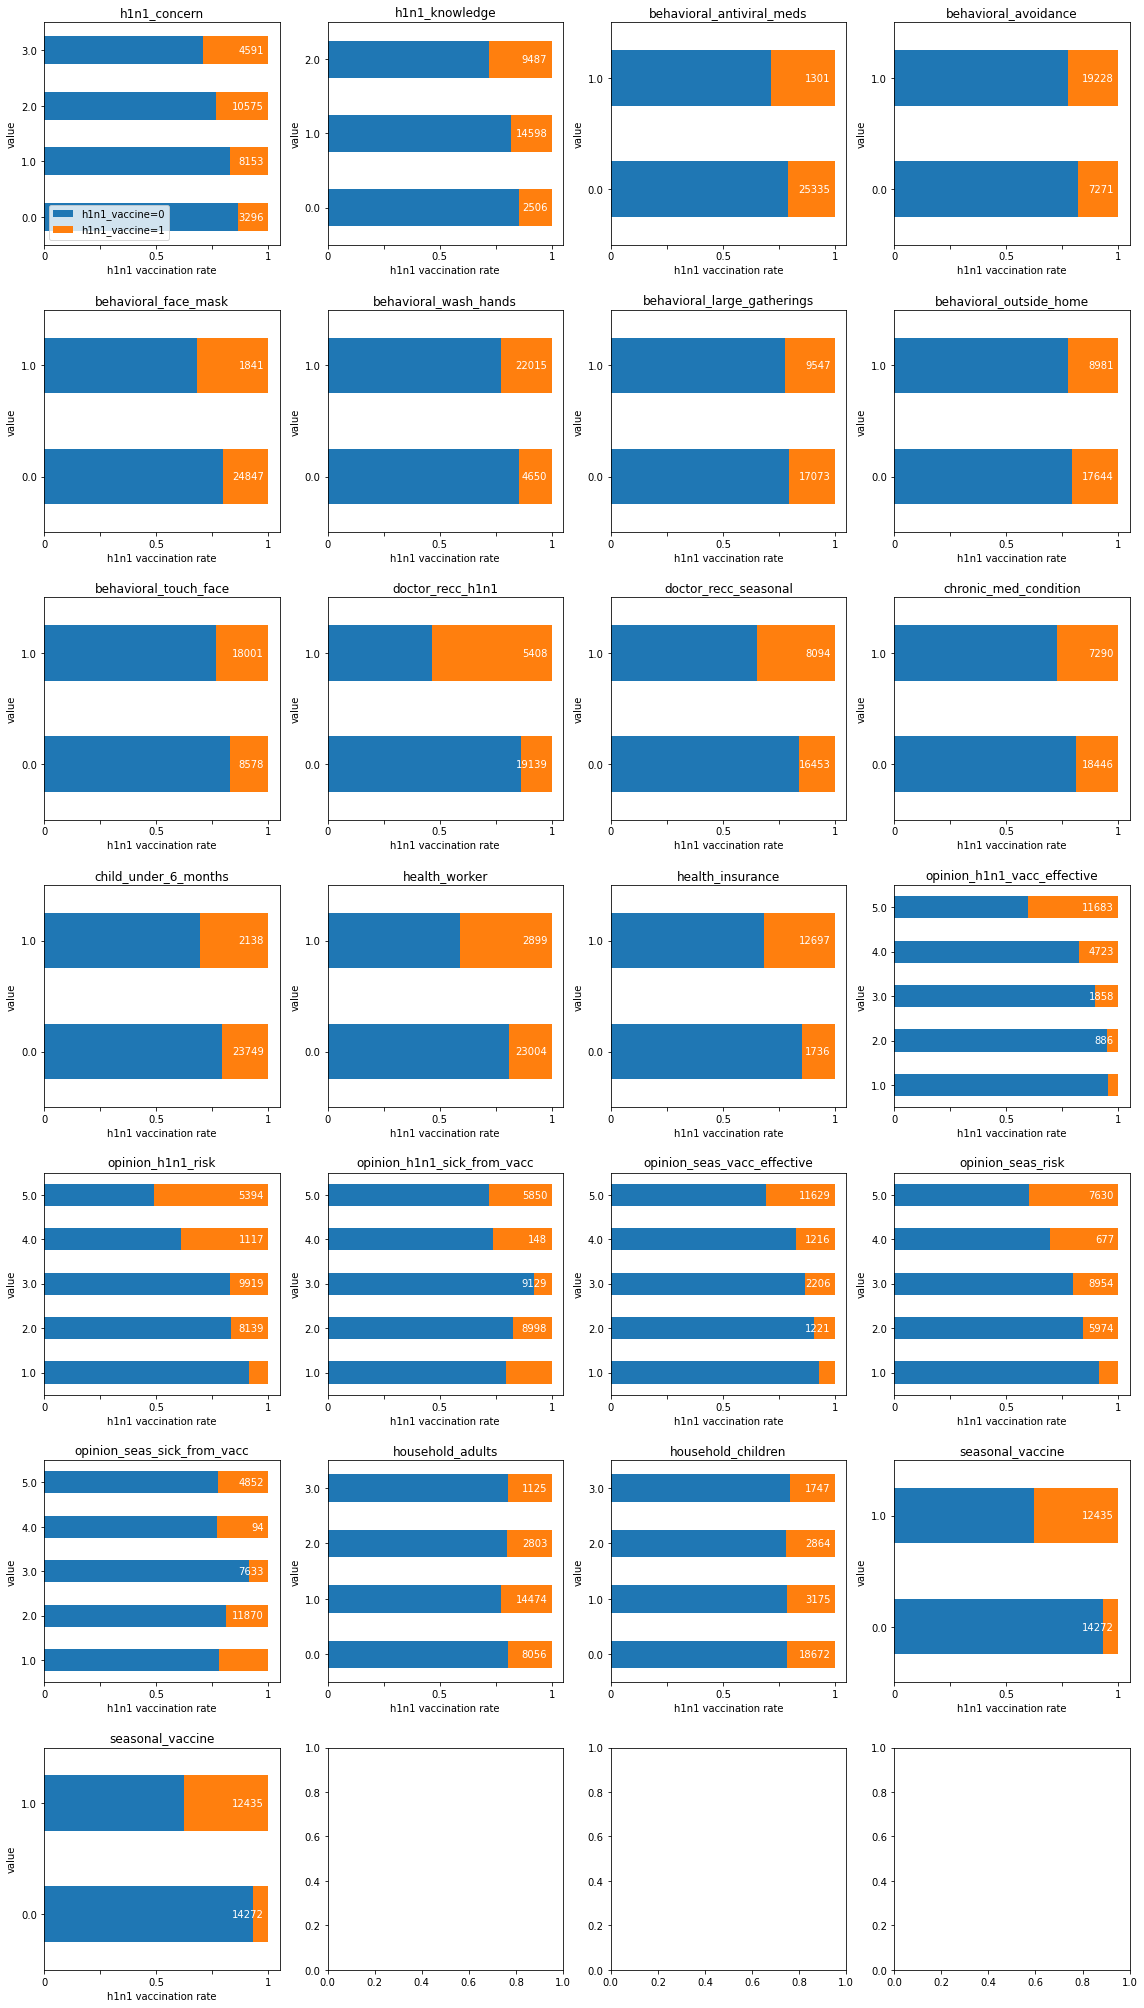

In [19]:
#For each numeric variable, generate the stacked plot showing vaccination rate by value

fig, axs = plt.subplots(int(np.ceil(len(cols_numeric)/4)), 4, figsize=(16, 4*np.ceil(len(cols_numeric)/4)))

for idx, col in enumerate(cols_numeric):
    if idx==0: #only plot legend for the first subplot
        plot_h1n1vac_rate(data_full, col, ax=axs.ravel()[idx], valuecount=True)
    else:
        plot_h1n1vac_rate(data_full, col, ax=axs.ravel()[idx], valuecount=True, legend=False)

fig.tight_layout()

***
***

## Data Analysis

---

## Logistic Regression Models

### Data Preprocessing (Imputing, Scaling, and Sorting by Predictive Value)

Since each variable may have some missing responses (NaN), and variables may have different ranges in being fed into regularization within a regression model, we will first standardize the dataset across these numeric variables.

Since they are a minority, missing values will be filled in via imputing with the median value.
Variables will then be scaled to have zero mean and unit variance.

We will consider the predictive power of each numerical variable in isolation, and sort the variables in descending order by this accuracy measure.


In [20]:
## Code to calculate prediction accuracy from each numerical variable (in isolation)
#  This will be done after Imputing the data with the median (to replace NaNs)
#  and by rescaling the data to range from 0 to 1 (for ease of comparing coefficient weights)
#   [allows for fitting an intercept term, and comparision is to base model of a constant column]

#Import libraries for logistic regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

#Define a function to get the accuracy of a single feature in predicting h1n1_vaccination
def get_singlefeature_accuracy(df, col_name, target_name):
    # inputs: 
    #         df -- dataframe
    #         col_name -- string of the column name in df to use as independent variable
    #         target_name -- string of the column name in df to use as the target variable
    #
    # returns: coef, score, coef_Base, score_Base
    #
    # outputs:
    #         coef -- coefficient fit to the independent variable in col_name
    #         score -- average accuracy (across CV folds for the optimal C regularization term)
    #         coef_Base -- same as coef, but for the model fit to a constant term (all 1s)
    #         score_Base -- same as score, but for the model fit to a constant term (all 1s)
    
    dfsubset = df[[col_name, target_name]].copy()
    
    X=dfsubset[[col_name]]
    y=dfsubset[target_name]
    
    imputer = SimpleImputer(strategy='median') #apply median imputer to fill in missing data
    imputed_X = imputer.fit_transform(X)
    imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
    
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(imputed_X)
    scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
    
    Xones = scaled_X.copy()
    Xones[:] = 1
    
    scaled_Xmat = pd.concat([scaled_X, Xones], axis=1)
    
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42)
    logreg.fit(scaled_Xmat, y)
    
    logregBASE = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42)
    logregBASE.fit(Xones, y)
        
    #return variables, for scores -- take the mean accuracy across CV folds, then pick the max (corresponding to the optimal C regularization term)
    return logreg.coef_, np.max(np.mean(logreg.scores_[1], axis=0)), logregBASE.coef_, np.max(np.mean(logregBASE.scores_[1], axis=0))


#Define a function to take in variable names, and return them along with their coefficients (fitted in isolation),
# sorted in descending order by cross-validated accuracy
def get_featureregression_accuracy(df, col_names, target_name):
    # inputs: 
    #         df -- dataframe
    #         col_names -- a list of strings containing the column names to consider in isolation
    #         target_name -- a string containing the name of the column to use as a target variable
    #
    # returns: df_out
    #
    # outputs:
    #         df_out -- a summary dataframe listing each variable, it's coefficient, and average accuracy in predicting the target
    #                   (this dataframe is sorted in descending order by accuracy, and also includes columns listing the performance of a base model applied to constant inputs)
    
    scores = []    
    coefs = []
    scoresBASE = []
    coefsBASE = []
    for idx, col_name in enumerate(col_names):
        coef, score, coefBASE, scoreBASE = get_singlefeature_accuracy(df, col_name, target_name)
        coefs.append(coef[0][0])
        scores.append(score)
        coefsBASE.append(coefBASE[0][0])
        scoresBASE.append(scoreBASE)
    
    df_out = pd.DataFrame({'variable': col_names, 'coefficient': coefs, 'coefficientBase': coefsBASE, 'accuracy': scores, 'accuracyBASE': scoresBASE})
    df_out.sort_values(by=['accuracy'], ascending=False, inplace=True)
    return df_out

In [21]:
numeric_accuracy = get_featureregression_accuracy(data_full, list(cols_numeric), 'h1n1_vaccine')
numeric_accuracy

,variable,coefficient,coefficientBase,accuracy,accuracyBASE
9,doctor_recc_h1n1,0.779378,-0.335739,0.800652,0.787546
16,opinion_h1n1_risk,0.716088,-0.335739,0.788969,0.787546
0,h1n1_concern,0.083227,-0.335739,0.787546,0.787546
13,health_worker,0.113219,-0.335739,0.787546,0.787546
23,seasonal_vaccine,0.257869,-0.335739,0.787546,0.787546
22,household_children,-0.001755,-0.335739,0.787546,0.787546
21,household_adults,0.005005,-0.335739,0.787546,0.787546
20,opinion_seas_sick_from_vacc,0.005751,-0.335739,0.787546,0.787546
19,opinion_seas_risk,0.174674,-0.335739,0.787546,0.787546
18,opinion_seas_vacc_effective,0.122949,-0.335739,0.787546,0.787546


From the above table, we can see that, in isolation, only two variables 'doctor_recc_h1n1' and 'opinion_h1n1_risk' give a greater accuracy in predicting H1N1 vaccination than the null model (no independent variable). Thus, these are the most promising first two variables to include in our regression model.

### A function that takes in all variable types and returns regression accuracy
Next, we will define a function to compare accuracy across all variables (in isolation), whether they be numerical or categorical. Categorical variables will be one-hot encoded before rescaling and fit in a regression model.

In [22]:


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV

# Define a function to take in a dataframe (df) and target variable (y), and transform the columns appropriately (impute, scale, onehotencode) and fit a regression model
def transform_and_regress(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         logmodel -- logistic regression model object returned after fitting
    #         coefs -- coefficients of the model fit
    #         score -- average accuracy score (across CV folds)
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    imputer_median = SimpleImputer(strategy='median') #imputer for numeric data (median)
    imputer_missing = SimpleImputer(strategy='constant', fill_value='missing') #imputer for categorial data ('missing')
    ohe = OneHotEncoder(categories='auto', drop='first', sparse=False) #onehotencoder for categorical data
    scaler_num = StandardScaler() #standard scaler, numerical columns
    scaler_cat = StandardScaler() #standard scaler, categorical columns (after onehotencoding)
    
    #split dataframe into numerical and categorical
    if len(numerical_col)>0: #if we have any numerical columns
        df_num = df[numerical_col].copy()  
        df_num_transformed = scaler_num.fit_transform(imputer_median.fit_transform(df_num)) #impute and scale the numerical data
        df_num = pd.DataFrame(df_num_transformed, columns=df_num.columns) #convert back to dataframe with column labels
    
    if len(categorical_col)>0: #if we have any categorical columns
        df_cat = df[categorical_col].copy()
        df_cat_transformed = scaler_cat.fit_transform(ohe.fit_transform(imputer_missing.fit_transform(df_cat))) #impute missing, one hot encoding, and scale
        df_cat = pd.DataFrame(df_cat_transformed, columns=ohe.get_feature_names())#convert back to dataframe with new onehotencoded column labels
    
    if len(numerical_col)>0 and len(categorical_col)>0:
        df_out = pd.concat([df_num, df_cat], axis=1) #concatenate the numerical and categorical columns into a dataframe for regression
    elif len(numerical_col)==0 and len(categorical_col)>0: #if no numerical columns
        df_out = df_cat #output is just the categorical columns
    elif len(numerical_col)>0 and len(categorical_col)==0: #if no categorical columns
        df_out = df_num #output is just the numerical columns
        
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
    logreg.fit(df_out, y) #fit a cross validated logistic regression model
        
    #returns the transformed dataframe, the logistic model, the coefficients, and the average accuracy (averaged across CV folds, but chosen for peak C regularization term)
    return df_out, logreg, logreg.coef_, np.max(np.mean(logreg.scores_[1], axis=0))
  

# Define a function that iterates over each variable in a dataframe and tallies the accuracy of a regression model fit to that variable in isolation (along with an intercept)
# returns a list of variables, sorted in descending order by accuracy
def single_variable_regression_accuracy(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_summary
    #
    # outputs:
    #         df_summary -- a dataframe summarizing regression performance on individual variables, with columns ['varname', 'accuracy','coefs']
    
    varnames=[]
    accuracy=[]
    coefficients=[]
    
    for col in df.columns: #loop over individual columns
        
        df_out, logmodel, coef, score = transform_and_regress(df[[col]], y) #transform data and fit regression model
        varnames.append(col) #append outputs
        accuracy.append(score)
        coefficients.append(coef)
    
    df_summary = pd.DataFrame(data={'varname': varnames, 'accuracy': accuracy, 'coefs': coefficients}) #store outputs in dataframe
    df_summary.sort_values(by=['accuracy'], ascending=False, inplace=True) #sort variables by descending accuracy
    
    return df_summary

In [23]:
#df_summary = single_variable_regression_accuracy(data_full[['h1n1_concern','sex']], data_full['h1n1_vaccine'])
df_summary = single_variable_regression_accuracy(data_full[cols_numeric + cols_cat], data_full['h1n1_vaccine'])
df_summary

,varname,accuracy,coefs
9,doctor_recc_h1n1,0.800651,[[0.260912950083364]]
16,opinion_h1n1_risk,0.788969,[[0.5255075068263039]]
18,opinion_seas_vacc_effective,0.787546,[[0.11997228532084951]]
20,opinion_seas_sick_from_vacc,0.787546,[[0.00562651830421424]]
21,household_adults,0.787546,[[0.004896784448781143]]
22,household_children,0.787546,[[-0.0017168070611618686]]
23,seasonal_vaccine,0.787546,"[[0.19536915645080258, 0.19536915645080258, 0...."
24,seasonal_vaccine,0.787546,"[[0.19536915645080258, 0.19536915645080258, 0...."
25,age_group,0.787546,"[[-0.007241725202948863, -0.010731921715306401..."
0,h1n1_concern,0.787546,[[0.08141114381244423]]


Again, we can see that only two variables on their own outperform the null regression model. 

### Apply logistic regression to all variables combined and evaluate performance
Let's apply the logistic regression model to all these input variables simulateously, and see how well it performs, using the default regularization.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define a pipeline for preprocessing column data (imputing, scaling, onehotencoding) and applying logistic regression, returning a model object
def logistic_pipeline(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         full_pipeline -- pipeline object after the applied fit
    #         coefs -- a list of the coefficient weights of the model
    #         score -- average accuracy score (averaged over cross validation folds)
    
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #impute the median value
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #impute 'missing' label
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)), #onehotencode the variables
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    preprocessing_pipeline = ColumnTransformer([
        ('numerical_preprocessor', numerical_pipeline, numerical_col),
        ('categorical_preprocessor', categorical_pipeline, categorical_col)
    ])
    
    full_pipeline = Pipeline([
        ('preprocessor', preprocessing_pipeline),
        ('estimator', LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42))
    ])
    
    full_pipeline.fit(df, y)
        
    df_out = preprocessing_pipeline.fit_transform(df)
    
    #return the: transformed_dataframe, pipeline, coefficients, score (averaged across CV folds and chosen for optimal C regularization term)
    return df_out, full_pipeline, full_pipeline.named_steps['estimator'].coef_, np.max(np.mean(full_pipeline.named_steps['estimator'].scores_[1], axis=0))
    

In [42]:
df_input = data_full.drop(labels=['h1n1_vaccine'], axis=1)
y = data_full['h1n1_vaccine']

df_out, full_pipeline, coefs, score = logistic_pipeline(df_input, y)
print('Logistic Regression accuracy (using all variables): ', score)


Logistic Regression accuracy (using all variables):  0.8523607845116853


We get a performance of 85% accuracy with feeding in the numerical + categorical variables into the regression model, and using default regularization penalty choices.

### Greedy Search

Now let's see if we can do any better with a greedy approach, where we iteratively add one variable at a time, at each step adding the variable that contributes the greatest boost to overall accuracy of the model.

In [43]:
#Define a function to identify the next best variable to add to the regression model
def find_next_best_variable(df, y, varlist):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #         varlist -- list of current variables in the model, input empty list if no current variables
    #
    # returns: df_summary, newvarlist, score, df_out, full_pipeline
    #
    # outputs:
    #         df_summary -- a DataFrame listing the summary performance of adding each considered variable to the model
    #         finalvarlist -- the original varlist with the best single variable appended onto it
    #         score -- accuracy of the model with that optimal variable added (averaged across CV folds and chosen for optimal C regularization term)
    #         df_out -- DataFrame that was fed to estimator (i.e. after imputing, scaling, onehotencoding)
    #         coefs -- coefficients of the optimal model
    #         full_pipeline -- pipeline object of the optimal model
    
    varcandidates = [col for col in df.columns if col not in varlist] #identify columns that are not in the current model
    tested_var = [] #initialize entries to store tested variables and model accuracy
    tested_accuracy = []
    
    for var in varcandidates: #loop over candidate variables
        #print(var)
        newvarlist = varlist.copy()
        newvarlist.append(var) #add current variable to the list
        
        df_input = df[newvarlist] #confine data to these considered variables
        df_out, full_pipeline, coefs, score = logistic_pipeline(df_input, y) #run through the pipeline
        tested_var.append(var) #store variable name tested
        tested_accuracy.append(score) #store accuracy score
        
    df_summary = pd.DataFrame(data={'varname': tested_var, 'accuracy':tested_accuracy})    
    df_summary.sort_values(by=['accuracy'], ascending=False, inplace=True)
    
    finalvarlist = varlist.copy()
    finalvarlist.append(df_summary.iloc[0,0])
    score_out = df_summary.iloc[0,1]
    
    #now just reapply the pipeline to this optimal model with the additional variable so we can output the pipeline object
    df_input = df[finalvarlist] #confine data to these final variables
    df_out, full_pipeline, coefs, score = logistic_pipeline(df_input, y) #run through the pipeline
    
    return df_summary, finalvarlist, score_out, df_out, coefs, full_pipeline

#Define a function to iterate over variables, successively adding the next optimal variable (based on CV accuracy), up to N variables
def select_N_best_variables(df, y, N, printoutput=False):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #         N -- a scalar defining the final # of variables to include
    #         printoutput -- a logical flag to determine if we print progress to command line (optional, default: False)
    #
    # returns: df_summary, newvarlist, score, df_out, coefs, full_pipeline
    #
    # outputs:
    #         df_summary -- a DataFrame listing the cumulative performance of adding each  variable to the model
    #         output_varlist -- ordered list of the variables at they were added
    #         score -- accuracy of the final model with N variables (averaged across CV folds and chosen for optimal C regularization term)
    #         df_out -- DataFrame that was fed to estimator (i.e. after imputing, scaling, onehotencoding)
    #         coefs -- coefficients of the final model of N variables
    #         full_pipeline -- pipeline object of the final model
    output_varlist = []
    cumulative_accuracy = []
    
    for idx in range(N): #
        
        df_summary, finalvarlist, score, df_out, coefs, full_pipeline = find_next_best_variable(df, y, output_varlist) #find next best variable given current state of the list
        cumulative_accuracy.append(score)
        output_varlist = finalvarlist
        
        if printoutput:
            print('Identifying variable #', idx+1)
            print('best variable: ', finalvarlist[-1])
            print('cumulative accuracy: ', score), print('')
    
    
    df_summary = pd.DataFrame(data={'varname':output_varlist, 'cumulative accuracy':cumulative_accuracy})
    
    return df_summary, output_varlist, score, df_out, coefs, full_pipeline
    
    

In [44]:
df_summary, output_varlist, score, df_out, coefs, full_pipeline = select_N_best_variables(df_input[cols_numeric + cols_cat], data_full['h1n1_vaccine'], 30, printoutput=True)

Identifying variable # 1
best variable:  doctor_recc_h1n1
cumulative accuracy:  0.8006512310753452

Identifying variable # 2
best variable:  seasonal_vaccine
cumulative accuracy:  0.8372337788172871

Identifying variable # 3
best variable:  opinion_h1n1_vacc_effective
cumulative accuracy:  0.8378702024939809



KeyboardInterrupt: 

In [37]:
df_summary

,varname,cumulative accuracy
0,doctor_recc_h1n1,0.800652
1,seasonal_vaccine,0.837234
2,opinion_h1n1_vacc_effective,0.837870
3,health_worker,0.843150
4,opinion_h1n1_risk,0.844947
5,doctor_recc_seasonal,0.849328
6,h1n1_concern,0.850002
7,opinion_seas_vacc_effective,0.851275
8,child_under_6_months,0.851612
9,marital_status,0.851874


Text(0.5, 1.0, 'Performance vs # of Variables (greedy search)')

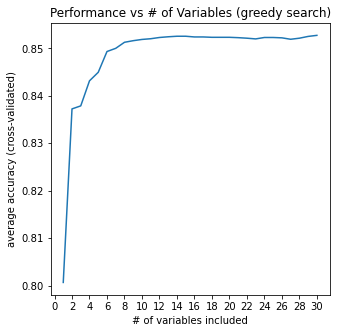

In [38]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(1+np.arange(df_summary.shape[0]),df_summary['cumulative accuracy'])
ax.set_xlabel('# of variables included')
ax.set_ylabel('average accuracy (cross-validated)')
ax.set_xticks(np.arange(0,31,2));
ax.set_title('Performance vs # of Variables (greedy search)')

Based on the above plot, it appears that including the topmost 11-14 variables yields the peak performance accuracy, with no major additional performance gains thereafter.

---
---

### Feature Engineering: Nonlinear pairwise products

So far we have only fit a linear model to predict H1N1 vaccination from the independent variables. We can see if we can increase performance by considering nonlinear components to the model. We will do this by exploring pairwise products of two dependent variables, and see how adding each product alone to the base linear model alters performance.

In [39]:
# Define a function that explores pairwise products of the input variables, to add nonlinear products to the regression model

def evaluate_pairwise_products(df_input, y, printoutput=False):
    # inputs: 
    #         df_input -- dataframe input of the relevant variables (where any categorical ones have already been onehotencoded through the pipeline)
    #         y -- target variable
    #         printoutput -- a logical flag on whether to print output to command line (optional, default: False)
    #         
    #
    # returns: df_input, df_product, pairs
    #
    # outputs:
    #         df_input -- simply a copy of the input dataframe
    #         df_product -- a dataframe where each column contains a pairwise product of 2 variables from df_input (sorted left to right in order of predictive power)
    #         pairs -- a dataframe containing pairwise indices ('variable1','variable2') and performance ('accuracy') -- sorted in descending order by accuracy (thus aligned with df_product order)
    
    
    n_variables = df_input.shape[1] #get number of input variables
    variable1=[] #initialize lists for element pairs of variables
    variable2=[]
    accuracy=[]
    
    for idx1 in range(n_variables-1): #store indices of variables 1 and 2 to compute pairwise product from
        for idx2 in range(idx1+1, n_variables):
            variable1.append(idx1)
            variable2.append(idx2)
    
    pairs=pd.DataFrame(data={'variable1':variable1, 'variable2':variable2})
    product_array = np.zeros((df_input.shape[0], pairs.shape[0]))
    
    for idx in range(pairs.shape[0]): #loop over product pairs
        idx1 = pairs.iloc[idx,0] #pull indices of element in the pair
        idx2 = pairs.iloc[idx,1]
        col1 = df_input.iloc[:, idx1] #pull values of that variable
        col2 = df_input.iloc[:, idx2]
        col_product = np.array(col1*col2) #compute product of variables 1 and 2
        product_array[:, idx] = col_product #store in product_array
        
        df_append = df_input.copy() #copy the input dataframe
        df_newproduct = pd.DataFrame(data={n_variables+1:col_product})
        df_append = pd.concat([df_append, df_newproduct], ignore_index=True, axis=1) #append pairwise product to input dataframe
        #df_append['new_product'] = col_product
        #df_append.iloc[:,n_variables+1] = col_product
        
        df_out, full_pipeline, coefs, score = logistic_pipeline(df_append, y) #pass dataframe with added pairwise_product variable through the pipeline
        
        if printoutput:
            print(f'Logistic Regression accuracy (using product of {idx1} and {idx2} variables): {score}')
        
        accuracy.append(score)
    
    pairs['accuracy'] = accuracy #store accuracy alongside pair indices
    pairs.sort_values(by=['accuracy'], ascending=False, inplace=True) #sort by descending accuracy
    sortidx = pairs.index #pull the index after sorting
    
    df_product = pd.DataFrame(product_array[:,sortidx]) #structure the product_array in the same order as pairs sorted by accuracy
    
    #returns the df_input (input dataframe), df_product (the dataframe of all pairwise products), and pairs (dataframe of product pairs and accuracy)
    # df_product and pairs are ordered in descending order from greatest accuracy to least (left to right columns for df_product, and top to bottom rows for pairs dataframe)
    return df_input, df_product, pairs

In [40]:
df_test = pd.DataFrame(data=df_out).iloc[:,:14] #use the first 14 identified variables from the greedy search

df_in, df_prod, pairs = evaluate_pairwise_products(df_test, y) #identify pairwise products of these variables (and their added accuracy)

Logistic Regression accuracy (using product of 0 and 1 variables): 0.8509380190109738
Logistic Regression accuracy (using product of 0 and 2 variables): 0.8511626918306282
Logistic Regression accuracy (using product of 0 and 3 variables): 0.8504137922454529
Logistic Regression accuracy (using product of 0 and 4 variables): 0.8509754932209574
Logistic Regression accuracy (using product of 0 and 5 variables): 0.8508257183509541
Logistic Regression accuracy (using product of 0 and 6 variables): 0.8506759182457925
Logistic Regression accuracy (using product of 0 and 7 variables): 0.850675981333688
Logistic Regression accuracy (using product of 0 and 8 variables): 0.8507507993720046
Logistic Regression accuracy (using product of 0 and 9 variables): 0.8511627170657864
Logistic Regression accuracy (using product of 0 and 10 variables): 0.851387356238563
Logistic Regression accuracy (using product of 0 and 11 variables): 0.8506385155354238
Logistic Regression accuracy (using product of 0 and 1

In [ ]:
df_prod

In [ ]:
pairs.head(20)


In [ ]:
num_products = 10
df_test = pd.concat([df_in, df_prod.iloc[:,:num_products]], ignore_index=True, axis=1)
print(df_test.shape)

df_testout, full_pipeline, coefs, score = logistic_pipeline(df_test, y) #pass dataframe with added pairwise_product variable through the pipeline
print(f'Logistic Regression accuracy (using top {num_products} pairwise products): {score}')

In [ ]:
from sklearn.model_selection import GridSearchCV

#clf = GridSearchCV(full_pipeline, {'estimator__Cs': [.1, 1, 10, 100]})
clf = GridSearchCV(full_pipeline, {'estimator__penalty': ['l1','l2','elasticnet']})
clf.fit(df_test, y)

In [ ]:
#gridparam = {'penalty':['l1','l2','elasticnet'], 'max_iter':[1000], 'tol':[1e-6], 'solver':['liblinear', 'lbfgs','saga']}
#gd = GridSearchCV(LogisticRegressionCV(Cs=20,fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42), gridparam)
#gridparam = {'Cs':[10,20,40], 'max_iter':[100, 200, 800], 'tol':[1e-6, 1e-4], 'solver':['liblinear', 'lbfgs']}
gridparam = {'Cs':[10,20,40], 'max_iter':[50, 100, 200], 'tol':[1e-6], 'class_weight':[None], 'solver':['liblinear','lbfgs']}
gd = GridSearchCV(LogisticRegressionCV(Cs=20,fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42), gridparam)

#gd.fit(df_test, y)
gd.fit(df_in, y)
gd.best_params_


In [ ]:
print(gd.best_estimator_)
print(gd.best_score_)
print(gd.best_params_)

### Get plot of Hyperparameter Space and also metric of F1 Score

### ROC curves?


### Apply Decision Tree analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import time

In [ ]:
df_test.shape

In [ ]:
X = df_test
y = data_full['h1n1_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Define a pipeline for preprocessing column data (imputing, scaling, onehotencoding if needed) and applying a decision tree, returning a model object
def decisiontree_pipeline(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         full_pipeline -- pipeline object after the decision tree fit
    
    
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #impute the median value
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #impute 'missing' label
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)), #onehotencode the variables
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    preprocessing_pipeline = ColumnTransformer([
        ('numerical_preprocessor', numerical_pipeline, numerical_col),
        ('categorical_preprocessor', categorical_pipeline, categorical_col)
    ])
    
    full_pipeline = Pipeline([
        ('preprocessor', preprocessing_pipeline),
        ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8, min_samples_split=0.05, min_samples_leaf=0.025))
    ])
    
    full_pipeline.fit(df, y)
        
    df_out = preprocessing_pipeline.fit_transform(df)
    
    #return the: transformed_dataframe, pipeline, coefficients, score (averaged across CV folds and chosen for optimal C regularization term)
    return df_out, full_pipeline#, full_pipeline.named_steps['estimator'].coef_, np.max(np.mean(full_pipeline.named_steps['estimator'].scores_[1], axis=0))
    

In [ ]:
X_dfout, decision_pipeline = decisiontree_pipeline(X_train, y_train)

In [ ]:
#dir(decision_pipeline)
acc = accuracy_score(y_test,decision_pipeline.predict(X_test))
print('Accuracy is :{0}'.format(100*acc))

In [ ]:
begin=time.time()

#clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8, min_samples_split=0.05, min_samples_leaf=0.025)
clf2.fit(X_train, y_train)

plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf2, filled=True, rounded=True)
plt.show()

end=time.time()
print(f'Total runtime is {end - begin}.')

y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(100*acc))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'roc_auc is : {roc_auc}')

### Hyperparameter tuning of the Decision Tree

#### max_depth parameter

In [ ]:
# Tune the 'max_depth' parameter of the tree
clf_parameters = {'clf__max_depth':list(np.arange(1,31,1))}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__max_depth'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(5,35,5))
ax.set_xlabel('max_depth')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('max_depth hyperparameter tuning')

print('Best Param: ', grid.best_params_)

#### min_samples_split parameter

In [ ]:
# Tune the 'min_samples_split' parameter of the tree
clf_parameters = {'clf__min_samples_split':list(np.arange(0.01,0.3,0.01)), 'clf__max_depth':[10]}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__min_samples_split'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(0,0.31,0.05))
ax.set_xlabel('min_samples_split')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('min_samples_split hyperparameter tuning')

print('Best Param: ', grid.best_params_)

#### min_samples_leaf parameter

In [ ]:
# Tune the 'min_samples_leaf' parameter of the tree
clf_parameters = {'clf__min_samples_leaf':list(np.arange(0.01,0.21,0.0125)), 'clf__max_depth':[10], 'clf__min_samples_split':[0.02]}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__min_samples_leaf'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(0,0.21,0.05))
ax.set_xlabel('min_samples_leaf')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('min_samples_leaf hyperparameter tuning')

print('Best Param: ', grid.best_params_)

#### max_features parameter

In [ ]:
# Tune the 'max_features' parameter of the tree
clf_parameters = {'clf__max_features':list(np.arange(1,25)), 'clf__max_depth':[10], 'clf__min_samples_split':[0.02], 'clf__min_samples_leaf':[0.02]}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__max_features'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(2,25,2))
ax.set_xlabel('max_features')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('max_features hyperparameter tuning')

print('Best Param: ', grid.best_params_)

In [ ]:
# Grid search across parameter ranges with similar performance to find optimal parameters in that corner of parameter space
clf_parameters = {'clf__max_features':list(np.arange(20,25)), 'clf__max_depth':[5,10,15,20], 'clf__min_samples_split':list(np.arange(0.01,0.06,0.01)), 'clf__min_samples_leaf':list(np.arange(0.01,0.05,0.01))}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

print('Best Param: ', grid.best_params_)

In [ ]:
dt = decision_pipeline

In [ ]:
dt.set_params(**grid.best_params_)
dt.fit(X_train, y_train)

In [ ]:
dt.score(X_train,y_train)
dt.score(X_test, y_test)

In [ ]:
dt['clf']

In [ ]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(dt['clf'], filled=True, rounded=True)
plt.show()

print(f'Training accuracy: {dt.score(X_train,y_train)}')
print(f'Test accuracy: {dt.score(X_test,y_test)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'roc_auc: {roc_auc}')

In [ ]:
pp = grid.best_params_
pp

In [ ]:
dt.steps[1].set_params(pp)

In [ ]:
dt.set_params(**pp)
dt

In [ ]:
clf = decision_pipeline

plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf2, filled=True, rounded=True)
plt.show()

print(f'Training accuracy: {grid.score(X_train,y_train)}')
print(f'Test accuracy: {grid.score(X_test,y_test)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'roc_auc: {roc_auc}')

In [ ]:
dir(grid)

In [ ]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

### SCRATCH CODE BELOW


### Write a function to define a processing pipeline, but one that PRESERVES the column names for interpretability (i.e. akin to a pipeline, but returns the labelled dataframe, the coefficients, the accuracy)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV

# Define a function to take in a dataframe (df) and target variable (y), and transform the columns appropriately (impute, scale, onehotencode) and fit a regression model
def transform_and_regress(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         logmodel -- logistic regression model object returned after fitting
    #         coefs -- coefficients of the model fit
    #         score -- average accuracy score (across CV folds)
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    imputer_median = SimpleImputer(strategy='median') #imputer for numeric data (median)
    imputer_missing = SimpleImputer(strategy='constant', fill_value='missing') #imputer for categorial data ('missing')
    ohe = OneHotEncoder(categories='auto', drop='first', sparse=False) #onehotencoder for categorical data
    scaler_num = StandardScaler() #standard scaler, numerical columns
    scaler_cat = StandardScaler() #standard scaler, categorical columns (after onehotencoding)
    
    #split dataframe into numerical and categorical
    if len(numerical_col)>0: #if we have any numerical columns
        df_num = df[numerical_col].copy()  
        df_num_transformed = scaler_num.fit_transform(imputer_median.fit_transform(df_num)) #impute and scale the numerical data
        df_num = pd.DataFrame(df_num_transformed, columns=df_num.columns) #convert back to dataframe with column labels
    
    if len(categorical_col)>0: #if we have any categorical columns
        df_cat = df[categorical_col].copy()
        df_cat_transformed = scaler_cat.fit_transform(ohe.fit_transform(imputer_missing.fit_transform(df_cat))) #impute missing, one hot encoding, and scale
        df_cat = pd.DataFrame(df_cat_transformed, columns=ohe.get_feature_names())#convert back to dataframe with new onehotencoded column labels
    
    if len(numerical_col)>0 and len(categorical_col)>0:
        df_out = pd.concat([df_num, df_cat], axis=1) #concatenate the numerical and categorical columns into a dataframe for regression
    elif len(numerical_col)==0 and len(categorical_col)>0: #if no numerical columns
        df_out = df_cat #output is just the categorical columns
    elif len(numerical_col)>0 and len(categorical_col)==0: #if no categorical columns
        df_out = df_num #output is just the numerical columns
        
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
    logreg.fit(df_out, y) #fit a cross validated logistic regression model
        
    return df_out, logreg, logreg.coef_, logreg.score(df_out,y).mean()
  

# Define a function that iterates over each variable in a dataframe and tallies the accuracy of a regression model fit to that variable in isolation (along with an intercept)
# returns a list of variables, sorted in descending order by accuracy
def single_variable_regression_accuracy(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_summary
    #
    # outputs:
    #         df_summary -- a dataframe summarizing regression performance on individual variables, with columns ['varname', 'accuracy','coefs']
    
    varnames=[]
    accuracy=[]
    coefficients=[]
    
    for col in df.columns: #loop over individual columns
        
        df_out, logmodel, coef, score = transform_and_regress(df[[col]], y) #transform data and fit regression model
        varnames.append(col) #append outputs
        accuracy.append(score)
        coefficients.append(coef)
    
    df_summary = pd.DataFrame(data={'varname': varnames, 'accuracy': accuracy, 'coefs': coefficients}) #store outputs in dataframe
    df_summary.sort_values(by=['accuracy'], ascending=False, inplace=True) #sort variables by descending accuracy
    
    return df_summary

In [ ]:
#df_summary = single_variable_regression_accuracy(data_full[['h1n1_concern','sex']], data_full['h1n1_vaccine'])
df_summary = single_variable_regression_accuracy(data_full[cols_numeric + cols_cat], data_full['h1n1_vaccine'])
df_summary
